# Logistic Regression from scratch

Our second model is logistic regression. In this first example we will perform a binary classification

We will train the algorithm in the [titanic](https://www.kaggle.com/c/titanic) dataset from kaggle.

I have already done an EDA and feature engineering so we have a ready to use dataset. More information here

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load data
df = pd.read_csv('train_file.csv')

In [3]:
y = df['Survived']
df.drop('Survived',inplace = True,axis = 1)

In [4]:
X = np.array(df)
y = np.array(y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 0)

### Now it's time to create the model

First, notation and equations that we are going to use in the code



**Notation:**

$\alpha = \text{Learning rate}$


$\nabla_{\theta} = \text{Gradient}$

$m = \text{Length of the training set}$

$\theta = \text{Theta parameters}$


-----------------------------

**Equations:**


**Sigmoid function**

$\sigma (p) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-p}}  $ 

**Model prediction** 

$p = \sigma(\theta \cdot X)$




$y =
\begin{cases}
  0 =\text {if  p} \lt 0.5\\
  1 =\text {if  p} \geq 0.5
\end{cases}
$



**Cost Function**

$\text {Binary cross entropy loss} = -\frac{1}{m} \sum_{i=1}^m[y log(p)+(1-y)log(1-p)]$

**Gradient**

$\nabla_{\theta} \to \frac{\partial}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m ({p - y})x$

**Vectorized Gradient**

$\nabla_{\theta}$  $ = \frac{1}{m} \cdot X^T (p- y)$

**Update theta**

$\theta = \theta - \alpha \cdot \nabla_{\theta}$


In [8]:
#Define Sigmoid function
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [14]:
##Function for training data
def fit(X,y,learning_rate,iterations):
    
    m,n = X.shape
    theta_init = np.random.randn(n) # Random Initialization of theta

    #add bias terms to X and theta
    X_with_bias = np.c_[np.ones(m),X] 
    theta_with_bias = np.insert(theta_init,0,0)
    
    cost = []
    for i in range(iterations):
        h = np.dot(X_with_bias,theta_with_bias)
        z = sigmoid(h)    
        J = (-1/m)*np.sum(y*np.log(z)+(1-y)*np.log(1-z))
        cost.append(J)
        error = z - y
        grad = (1/m)*np.dot(X_with_bias.T,error)
        theta_with_bias =  theta_with_bias - grad*learning_rate
    plt.plot(cost)
    plt.xlabel('Iterations')
    plt.ylabel('Binary cross entropy loss')
    plt.show()
    return theta_with_bias

<ipython-input-14-63b7439127e3>:15: RuntimeWarning: divide by zero encountered in log
  J = (-1/m)*np.sum(y*np.log(z)+(1-y)*np.log(1-z))


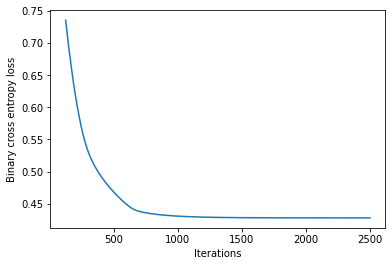

array([-0.57959117, -0.68932645,  0.01490285,  0.31398131, -0.31094936,
        0.92485156, -0.17938483, -0.66033661,  1.26127285,  0.28521387,
       -0.67768283, -0.48733032, -1.00250643,  0.45951244,  1.32430596,
        0.16846186,  0.27275377,  0.16866205,  0.33443568,  0.50206662,
        0.27801412, -0.02314531, -0.08085531, -0.02848592, -0.19645475,
        0.33448903, -0.21376635])

In [25]:
fit(X_train,y_train,0.05,2500)

In [ ]:
#Training the data
pred_train, theta,cost = log_reg(theta_with_bias,X_train_scaled,y_train,0.001)

In [ ]:
#Plotting Cost FUnction to see if it is working properly
plt.plot(cost)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
test_pred = sigmoid(np.dot(theta,X_test_scaled.T))
test_pred = (test_pred>=0.5).astype(int)

In [ ]:
acc_train = accuracy_score(y_train,pred_train)
acc_train

In [ ]:
acc_test = accuracy_score(y_test,test_pred)
acc_test